In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Load data

In [2]:
dataset = pd.read_excel("testing/hfsp_supplement/Mahlich.335.sup.data.1.xlsx", sheet_name="Swiss-Prot 2017")
alignment = pd.read_csv("testing/foldseek/alignmentOutput", sep="\t")

In [3]:
split_ec = dataset['ec_number'].str.split('.', expand=True)
dataset['ec_1'] = split_ec[0]
dataset['ec_2'] = split_ec[0] + '.' + split_ec[1]
dataset['ec_3'] = split_ec[0] + '.' + split_ec[1] + '.' + split_ec[2]
dataset['ec_4'] = split_ec[0] + '.' + split_ec[1] + '.' + split_ec[2] + '.' + split_ec[3]

In [4]:
dataset

,id,ec_number,domain,ec_1,ec_2,ec_3,ec_4
0,P00533,2.7.10.1,Eukarya,2,2.7,2.7.10,2.7.10.1
1,Q8WZ42,2.7.11.1,Eukarya,2,2.7,2.7.11,2.7.11.1
2,P31749,2.7.11.1,Eukarya,2,2.7,2.7.11,2.7.11.1
3,P21802,2.7.10.1,Eukarya,2,2.7,2.7.10,2.7.10.1
4,P12931,2.7.10.2,Eukarya,2,2.7,2.7.10,2.7.10.2
...,...,...,...,...,...,...,...
7017,P48775,1.13.11.11,Eukarya,1,1.13,1.13.11,1.13.11.11
7018,P77806,2.6.1.88,Bacteria,2,2.6,2.6.1,2.6.1.88
7019,P14680,2.7.12.1,Eukarya,2,2.7,2.7.12,2.7.12.1
7020,P36217,3.2.1.8,Eukarya,3,3.2,3.2.1,3.2.1.8


In [5]:
alignment

,query,target,evalue,bits,pident,fident,nident,alnlen,mismatch,gapopen,...,tend,tlen,lddt,rmsd,prob,qtmscore,ttmscore,alntmscore,qcov,tcov
0,P22734,P22734,5.248000e-58,2215,100.0,1.000,264,264,0,0,...,264,264,1.0000,0.00341,1.0,1.00000,1.00000,1.00000,1.000,1.000
1,P22734,P21964,1.457000e-47,1766,77.9,0.779,205,263,57,1,...,271,271,0.9638,1.21400,1.0,0.96870,0.94400,0.94400,0.992,0.970
2,P22734,Q40313,2.529000e-12,338,18.9,0.189,40,211,140,7,...,247,247,0.6119,3.83300,1.0,0.58650,0.62410,0.62410,0.716,0.818
3,P22734,O49499,1.977000e-12,296,16.9,0.169,43,253,154,9,...,259,259,0.5781,8.66400,1.0,0.55580,0.56580,0.56580,0.875,0.846
4,P22734,Q8GBB2,2.323000e-08,218,14.8,0.148,28,189,127,10,...,255,255,0.5421,4.00500,1.0,0.49710,0.51300,0.51300,0.644,0.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769677,Q9LFP0,Q99952,7.941000e+00,5,9.5,0.095,19,199,89,18,...,230,460,0.2136,15.59000,0.0,0.09422,0.07203,0.07203,0.864,0.309
8769678,Q9LFP0,Q5SLL5,8.450000e+00,5,5.3,0.053,8,150,63,8,...,158,529,0.1569,13.89000,0.0,0.09149,0.04817,0.04817,0.435,0.261
8769679,Q9LFP0,Q60048,8.991000e+00,5,8.7,0.087,20,228,82,13,...,604,711,0.1988,17.95000,0.0,0.11220,0.04721,0.04721,0.576,0.309
8769680,Q9LFP0,P36148,7.941000e+00,5,7.2,0.072,9,124,46,7,...,158,743,0.1673,12.46000,0.0,0.09464,0.03557,0.03557,0.314,0.160


## Plot EC number distribution

<Axes: xlabel='ec_1', ylabel='count'>

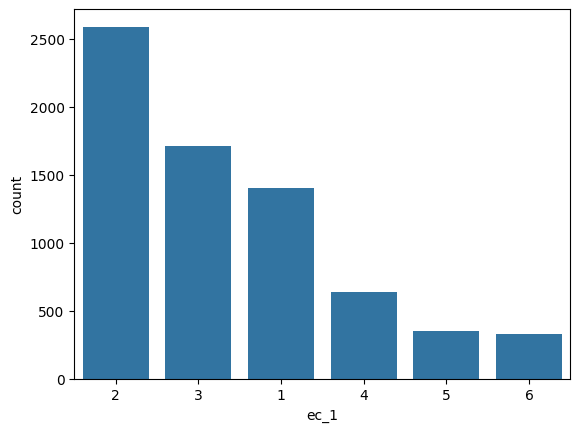

In [6]:
sns.countplot(data=dataset, x="ec_1", order=dataset.ec_1.value_counts().index)

<Axes: xlabel='ec_2', ylabel='count'>

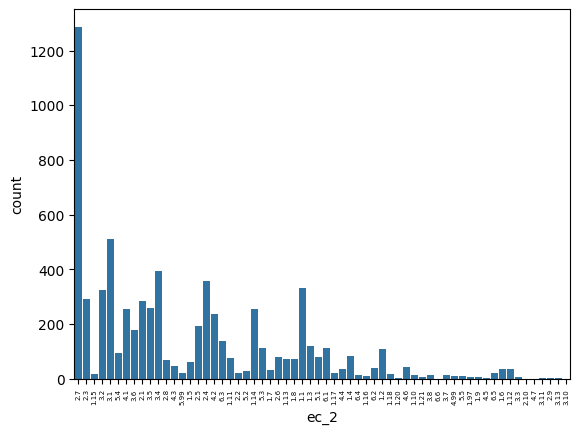

In [7]:

plt.xticks(rotation=90, fontsize=5)
sns.countplot(data=dataset, x="ec_2")

## Plot sequence length distribution

In [8]:
uniq_lenghts = alignment[["query", "qlen"]].drop_duplicates()["qlen"]

<Axes: xlabel='qlen', ylabel='Count'>

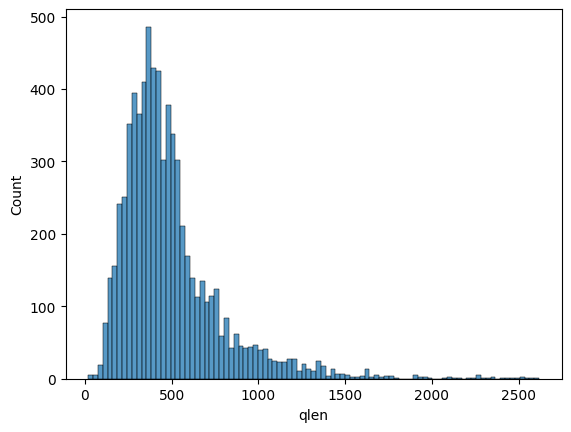

In [9]:
sns.histplot(uniq_lenghts)

## Plot LDDT distribution

<Axes: xlabel='lddt', ylabel='Count'>

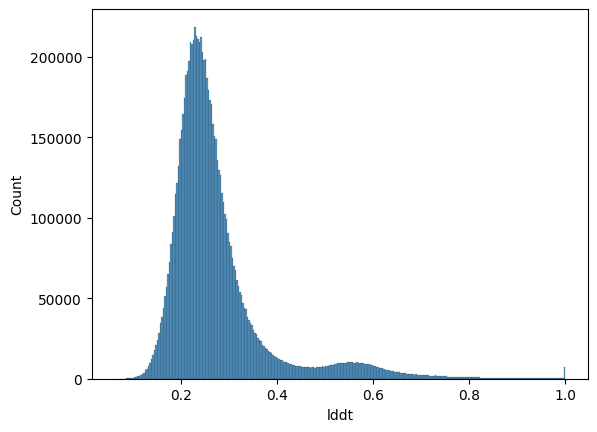

In [10]:
sns.histplot(alignment["lddt"], bins=300)

<Axes: xlabel='evalue', ylabel='Count'>

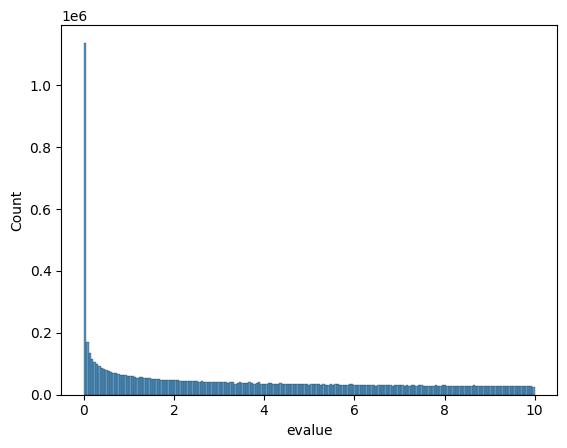

In [11]:
sns.histplot(alignment["evalue"])

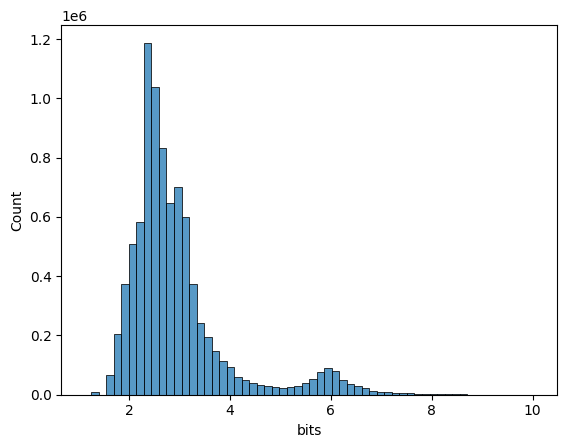

In [12]:
ax = sns.histplot(np.log(alignment["bits"]), bins=60)

<Axes: xlabel='alntmscore', ylabel='Count'>

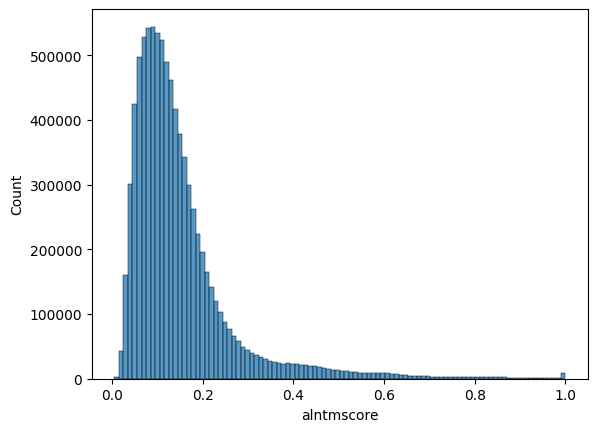

In [13]:
sns.histplot(alignment["alntmscore"], bins=100)